# Helping Donors Choose Donorschoose.org
<p style="font-size:18px"> A Kernel Submission to the Data Science for Good Kaggle Competition with Donorschoose.org </p>
<img src="donorschoose-image.png" alt="DonorsChoose.org" width="500" height="200">

## About DonorsChoose.org

## About the Data

## Questions we would like to ask

## Results of Analysis

### Initialization & Data Loading

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder

In [333]:
filepath = '/Users/tristan.j.alba/Google Drive/ds_projects/datascience'
df = pd.read_csv(filepath+'consolidated_df_sampled.csv').iloc[:,1:]

### Data Wrangling: Label Encoding

In [334]:
features = df.columns
features

Index(['Project ID', 'Donation ID', 'Donor ID',
       'Donation Included Optional Donation', 'Donation Amount',
       'Donor Cart Sequence', 'Donation Received Date', 'Resource Item Name',
       'Resource Quantity', 'Resource Unit Price', 'Resource Vendor Name',
       'Donor City', 'Donor State', 'Donor Is Teacher', 'Donor Zip',
       'School ID', 'Teacher ID', 'Teacher Project Posted Sequence',
       'Project Type', 'Project Title', 'Project Essay',
       'Project Short Description', 'Project Need Statement',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Posted Date', 'Project Expiration Date',
       'Project Current Status', 'Project Fully Funded Date', 'Teacher Prefix',
       'Teacher First Project Posted Date', 'School Name', 'School Metro Type',
       'School Percentage Free Lunch', 'School State', 'School Zip',
       'School City', 'School C

#### Identifying useful features and categorical variables

In [335]:
not_useful = ['Project ID', 'Donation ID','Donor ID','Donation Included Optional Donation',
          'Donor Cart Sequence','Resource Vendor Name','Resource Item Name', 
              'Teacher Project Posted Sequence','School ID', 'Teacher ID',
          'Project Title', 'Project Essay','Project Short Description',
          'Project Need Statement','School Name']

date_feat = ['Donation Received Date','Project Posted Date', 'Project Expiration Date',
        'Project Fully Funded Date','Teacher First Project Posted Date']

school_feat = ['Donation ID', 'Donor ID',
       'Donation Included Optional Donation', 'Donation Amount',
       'Donor Cart Sequence', 'Donation Received Date', 'Resource Item Name',
       'Resource Quantity', 'Resource Unit Price', 'Resource Vendor Name',
       'Donor City', 'Donor State', 'Donor Is Teacher', 'Donor Zip']

project_feat = ['Project Type', 'Project Title', 'Project Essay',
       'Project Short Description', 'Project Need Statement',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Posted Date', 'Project Expiration Date',
       'Project Current Status', 'Project Fully Funded Date', 'Teacher Prefix',
       'Teacher First Project Posted Date', 'School Name', 'School Metro Type',
       'School Percentage Free Lunch', 'School State', 'School Zip',
       'School City', 'School County', 'School District']

cat_feat = ['Donor City', 'Donor State', 'Donor Is Teacher', 'Donor Zip',
            'Project Type','Project Subject Category Tree', 
            'Project Subject Subcategory Tree',
            'Project Grade Level Category', 'Project Resource Category',
            'Project Current Status','Teacher Prefix','School Metro Type',
            'School State', 'School Zip','School City','School County', 'School District']
            
            

#### Dropping not so useful features

In [336]:
df_new = df.drop(labels=not_useful,axis = 1)

#### Dropping datetime features (for now)

In [337]:
df_new = df_new.drop(labels=date_feat,axis = 1)

In [338]:
cat_feat_new = []
for x in df_new.columns.tolist(): 
    if x in cat_feat:
        cat_feat_new.append(x)

#### Dropping NaN values

In [339]:
df_new.dropna(axis=0, inplace=True)
#df_new[pd.isnull(df_new).any(axis=1)]

#### Encoding numerical labels into categorical variables

In [340]:
checker1 = df_new[df_new['School State']=='Alaska'].index.tolist()
checker2 = df_new[df_new['School Metro Type']=='town'].index.tolist()

In [341]:
labels = {}
for cat_feat_new in cat_feat_new:
    le = LabelEncoder()
    le.fit(df_new[cat_feat_new].value_counts().index.values)
    
    if df_new[cat_feat_new].dtype == 'float64' or\
    df_new[cat_feat_new].dtype == 'int':
        df_new[cat_feat_new] = le.transform(df_new[cat_feat_new])
    
    else:
        df_new[cat_feat_new] = le.transform(df_new[cat_feat_new].astype(str))
    
    labels[cat_feat_new] = list(le.classes_)

#### Checking whether label encoding is done properly

In [342]:
check = 0 

for i in checker1:
    if df_new['School State'].loc[i] != 1: check += 1

for i in checker2:
    if df_new['School Metro Type'].loc[i] != 2: check += 1
        
if check==0: print('Label Encoding Success') 
else: print('Label Encoding Error')

Label Encoding Success


#### Randomly sampling an arbitrary number of datapoints for initial analysis

In [348]:
n_rows = 10000
df_ = df_new.sample(n = n_rows, random_state = 123, axis = 0)
X = df_

### KMeans Clustering

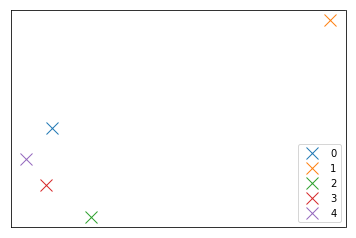

In [397]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5).fit(X)
for i in range(len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],'x', markersize=12, label=i);
    plt.xticks([], [])
    plt.yticks([], [])
    plt.legend(loc=4)

**Observations:** `n_clusters = 5` generates the most ideal separation among clusters from `n_clusters 1-10`

#### Storing Donor ID in corresponding clusters

In [449]:
cluster0 = df.iloc[X.iloc[kmeans.labels_==0,:].index]['Donor ID']
cluster1 = df.iloc[X.iloc[kmeans.labels_==1,:].index]['Donor ID']
cluster2 = df.iloc[X.iloc[kmeans.labels_==2,:].index]['Donor ID']
cluster3 = df.iloc[X.iloc[kmeans.labels_==3,:].index]['Donor ID']
cluster4 = df.iloc[X.iloc[kmeans.labels_==4,:].index]['Donor ID']

In [401]:
y = kmeans.labels_

### KNearest Neighbors Classification

In [403]:
X.columns

Index(['Donation Amount', 'Resource Quantity', 'Resource Unit Price',
       'Donor City', 'Donor State', 'Donor Is Teacher', 'Donor Zip',
       'Project Type', 'Project Subject Category Tree',
       'Project Subject Subcategory Tree', 'Project Grade Level Category',
       'Project Resource Category', 'Project Cost', 'Project Current Status',
       'Teacher Prefix', 'School Metro Type', 'School Percentage Free Lunch',
       'School State', 'School Zip', 'School City', 'School County',
       'School District'],
      dtype='object')

In [406]:
X_clf = X[['Project Type', 'Project Subject Category Tree',
       'Project Subject Subcategory Tree', 'Project Grade Level Category',
       'Project Resource Category', 'Project Cost', 'Project Current Status',
       'Teacher Prefix', 'School Metro Type', 'School Percentage Free Lunch',
       'School State', 'School Zip', 'School City', 'School County',
       'School District']]

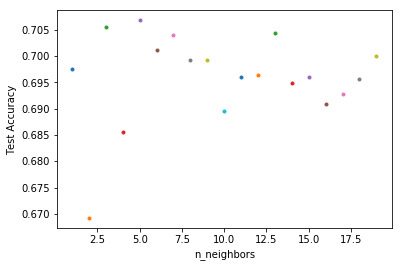

In [437]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clf, y, test_size = 0.25, 
                                                    random_state = 123)
from sklearn.neighbors import KNeighborsClassifier
for n in range(1,20,1):
    clf = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    plt.plot(n,clf.score(X_test, y_test),'.')
    plt.xlabel("n_neighbors")
    plt.ylabel("Test Accuracy")


**Observations:** It appears that `n_neighbors = 5` yields the highest test accuracy at around 70%

0.7148


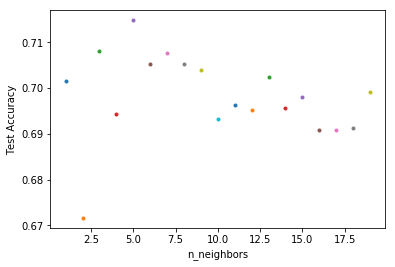

In [462]:
X_clf_ = X[['Project Type', 'Project Subject Category Tree',
            'Project Grade Level Category',
       'Project Resource Category', 'Project Cost', 'Project Current Status',
        'School Metro Type', 'School Percentage Free Lunch',
       'School State', 'School Zip', 'School City', 'School County',
       'School District']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clf_, y, test_size = 0.25, 
                                                    random_state = 123)
from sklearn.neighbors import KNeighborsClassifier
for n in range(1,20,1):
    clf = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    plt.plot(n,clf.score(X_test, y_test),'.')
    plt.xlabel("n_neighbors")
    plt.ylabel("Test Accuracy")
    
print(KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train).score(X_test, y_test))

In [478]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clf, y, test_size = 0.25, 
                                                    random_state = 123)
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc.score(X_test,y_test)

0.7168